In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv',sep=";")
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


# TASK 1: Data Cleaning

In [3]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Reason for absence'),
  Text(2, 0, 'Month of absence'),
  Text(3, 0, 'Day of the week'),
  Text(4, 0, 'Seasons'),
  Text(5, 0, 'Transportation expense'),
  Text(6, 0, 'Distance from Residence to Work'),
  Text(7, 0, 'Service time'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Work load Average/day '),
  Text(10, 0, 'Hit target'),
  Text(11, 0, 'Disciplinary failure'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Son'),
  Text(14, 0, 'Social drinker'),
  Text(15, 0, 'Social smoker'),
  Text(16, 0, 'Pet'),
  Text(17, 0, 'Weight'),
  Text(18, 0, 'Height'),
  Text(19, 0, 'Body mass index'),
  Text(20, 0, 'Absenteeism time in hours')])

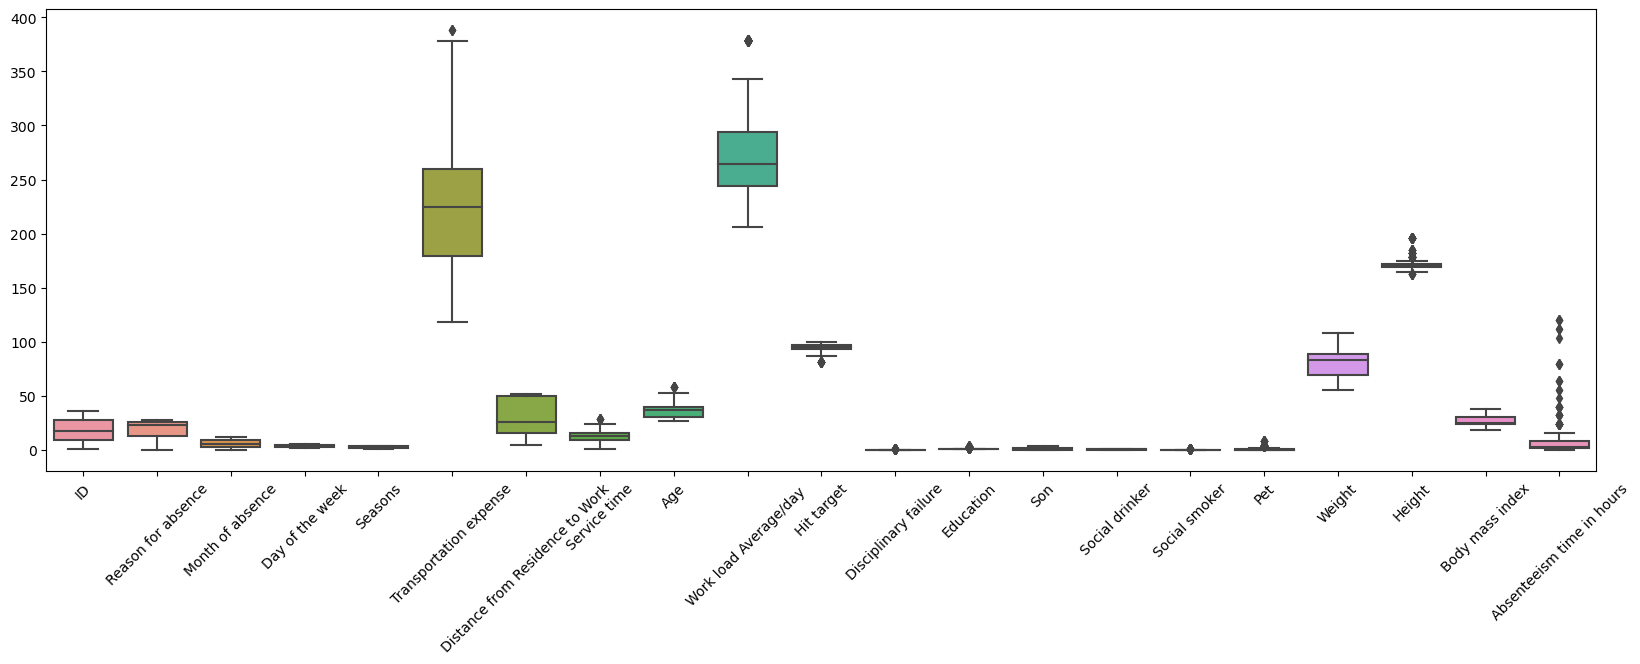

In [5]:
sns.boxplot(data = df)
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

In [6]:
def iqr_winsorization(df, thresh=1.5):
    # Create a copy to avoid modifying original data
    df_out = df.copy()

    for col_name in df_out.columns:
        col = df_out[col_name]
        
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(col):
            # Calculate IQR
            Q1 = col.quantile(0.25)
            Q3 = col.quantile(0.75)
            IQR = Q3 - Q1

            # Define fences
            lower_fence = Q1 - thresh * IQR
            upper_fence = Q3 + thresh * IQR

            # Winsorize outliers
            df_out.loc[df_out[col_name] < lower_fence, col_name] = lower_fence
            df_out.loc[df_out[col_name] > upper_fence, col_name] = upper_fence
        else:
            print(f'Column "{col_name}" is not numeric, no outliers treated.')

    return df_out


# Perform outlier treatment on all columns
data= iqr_winsorization(df)
print(data)


       ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11.0                26.0                 7                3        1   
1    36.0                 0.0                 7                3        1   
2     3.0                23.0                 7                4        1   
3     7.0                 7.0                 7                5        1   
4    11.0                23.0                 7                5        1   
..    ...                 ...               ...              ...      ...   
735  11.0                14.0                 7                3        1   
736   1.0                11.0                 7                3        1   
737   4.0                 0.0                 0                3        1   
738   8.0                 0.0                 0                4        2   
739  35.0                 0.0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Reason for absence'),
  Text(2, 0, 'Month of absence'),
  Text(3, 0, 'Day of the week'),
  Text(4, 0, 'Seasons'),
  Text(5, 0, 'Transportation expense'),
  Text(6, 0, 'Distance from Residence to Work'),
  Text(7, 0, 'Service time'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Work load Average/day '),
  Text(10, 0, 'Hit target'),
  Text(11, 0, 'Disciplinary failure'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Son'),
  Text(14, 0, 'Social drinker'),
  Text(15, 0, 'Social smoker'),
  Text(16, 0, 'Pet'),
  Text(17, 0, 'Weight'),
  Text(18, 0, 'Height'),
  Text(19, 0, 'Body mass index'),
  Text(20, 0, 'Absenteeism time in hours')])

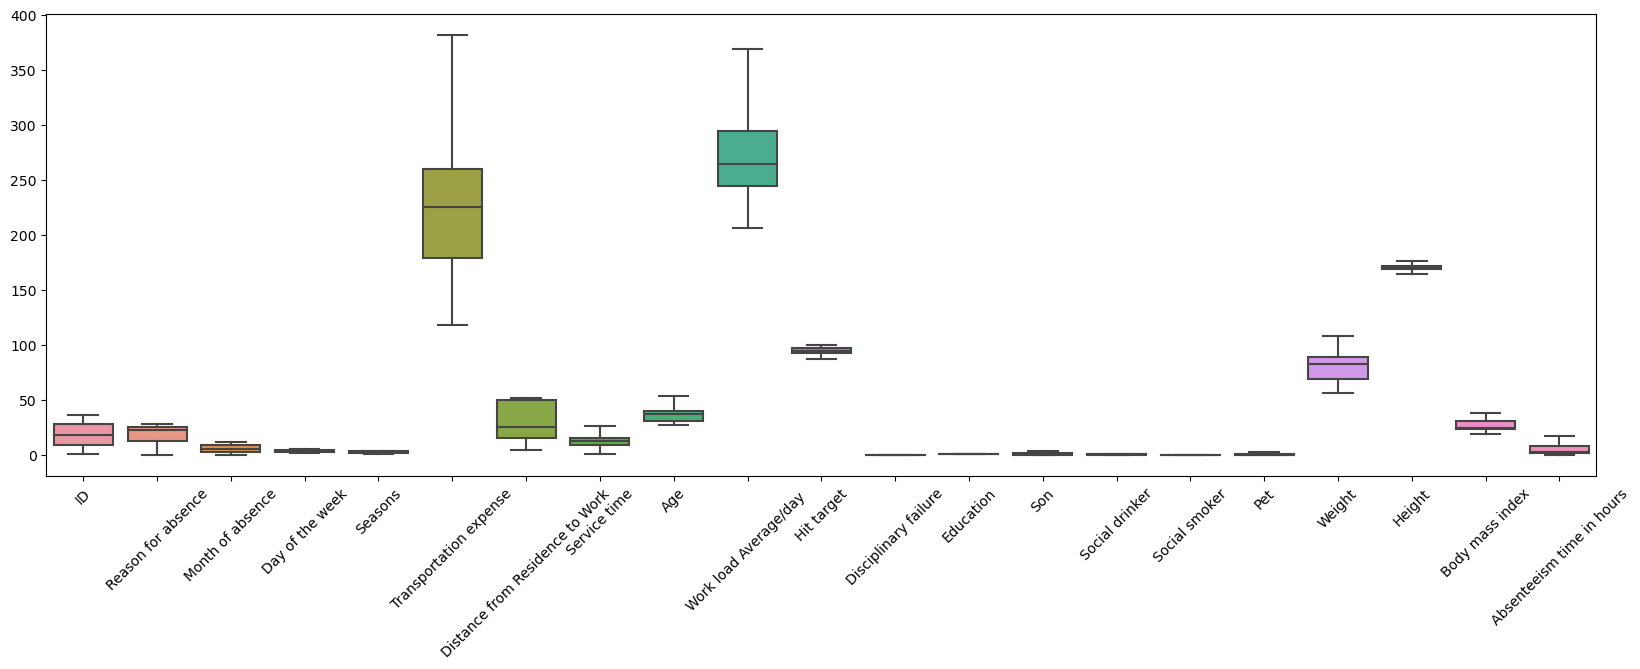

In [7]:
sns.boxplot(data = data)
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

In [64]:
data.to_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data_cleaned.csv')

# TASK 2: Analyze Reasons for Absenteeism

Text(0.5, 1.0, 'distribustion ')

<Figure size 1500x1000 with 0 Axes>

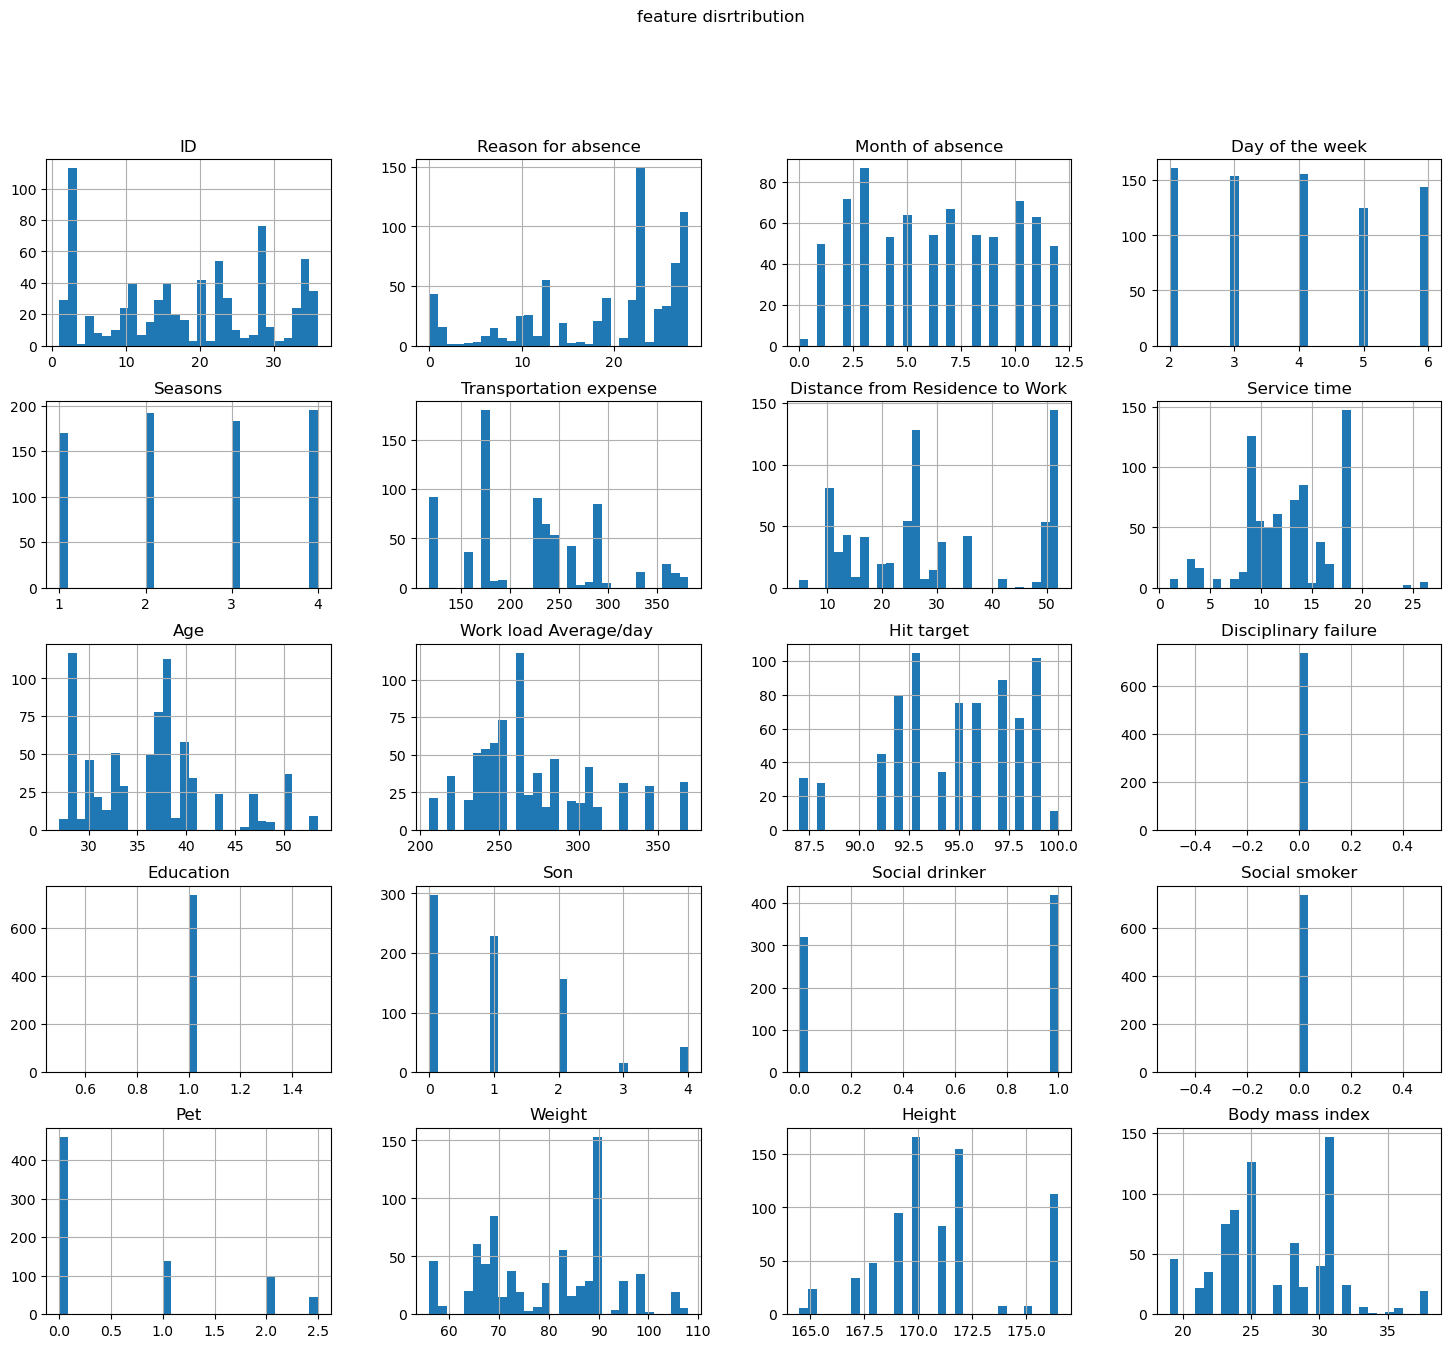

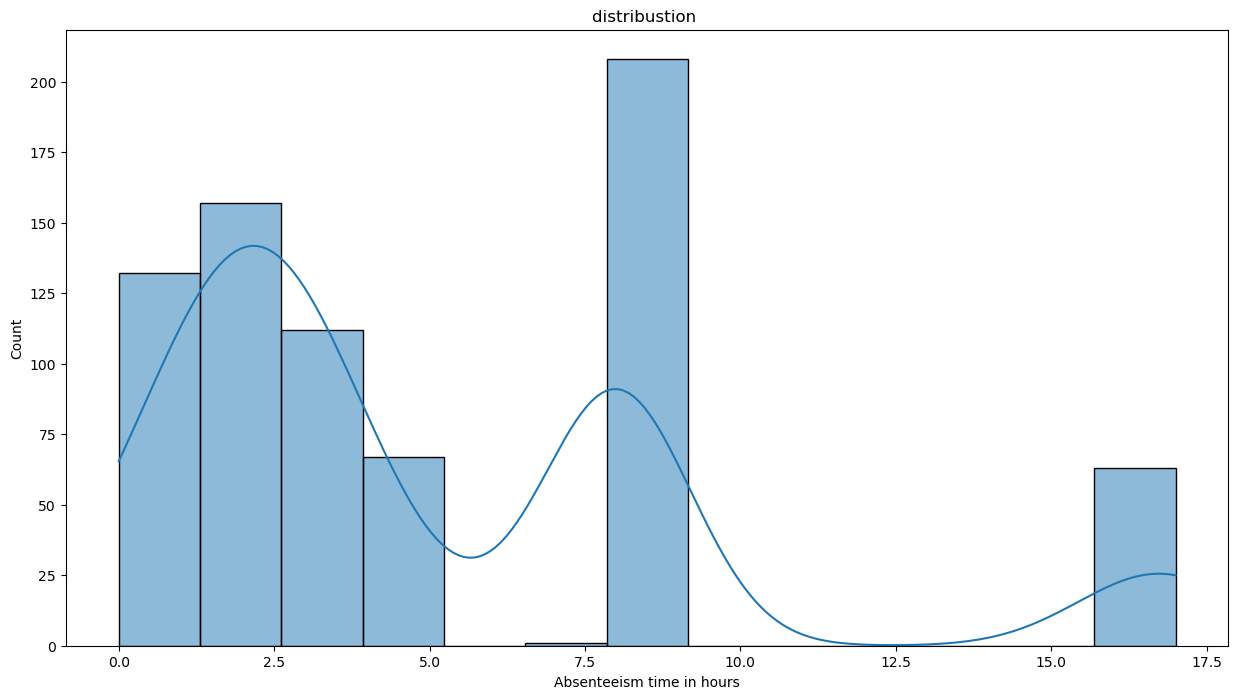

In [8]:
plt.figure(figsize=(15,10))
data.drop("Absenteeism time in hours",axis=1).hist(bins=30,figsize=(18,15))
plt.suptitle("feature disrtribution")

plt.figure(figsize=(15,8))
sns.histplot(data["Absenteeism time in hours"],kde=True)
plt.title("distribustion ")

Interpretation: The right-skew indicates that there are some cases of extended absences, which might be worth investigating to identify potential causes and address them.
The majority of absences fall within the 2-10 hour range, which could be considered typical.

In [46]:
#descriptive analye
age_group=data.groupby("Age")["Absenteeism time in hours"].agg(["mean","median","count"])
Education_group=data.groupby("Education")["Absenteeism time in hours"].agg(["mean","median","count"])
Disciplinary_group=data.groupby("Disciplinary failure")["Absenteeism time in hours"].agg(["mean","median","count"])
print("age_group:",age_group)
print("Education_group:",Education_group)
print("Disciplinary_group:",Disciplinary_group)

age_group:           mean  median  count
Age                          
27.0  3.857143     2.0      7
28.0  4.495726     3.0    117
29.0  4.428571     3.0      7
30.0  4.326087     2.0     46
31.0  6.681818     8.0     22
32.0  3.692308     3.0     13
33.0  8.137255     8.0     51
34.0  7.827586     5.0     29
36.0  5.680000     4.0     50
37.0  4.666667     3.0     78
38.0  3.946903     3.0    113
39.0  3.750000     1.0      8
40.0  4.689655     3.0     58
41.0  7.029412     8.0     34
43.0  5.833333     8.0     24
46.0  8.000000     8.0      2
47.0  3.041667     2.0     24
48.0  4.166667     4.5      6
49.0  3.200000     2.0      5
50.0  3.972973     2.0     37
53.0  0.000000     0.0      1
53.5  8.000000     8.0      8
Education_group:                mean  median  count
Education                         
1          5.048649     3.0    740
Disciplinary_group:                           mean  median  count
Disciplinary failure                         
0                     5.048649     

age_group:           mean  median  count
Age                          
27.0  3.857143     2.0      7
28.0  4.495726     3.0    117
29.0  4.428571     3.0      7
30.0  4.326087     2.0     46
31.0  6.681818     8.0     22
32.0  3.692308     3.0     13
33.0  8.137255     8.0     51
34.0  7.827586     5.0     29
36.0  5.680000     4.0     50
37.0  4.666667     3.0     78
38.0  3.946903     3.0    113
39.0  3.750000     1.0      8
40.0  4.689655     3.0     58
41.0  7.029412     8.0     34
43.0  5.833333     8.0     24
46.0  8.000000     8.0      2
47.0  3.041667     2.0     24
48.0  4.166667     4.5      6
49.0  3.200000     2.0      5
50.0  3.972973     2.0     37
53.0  0.000000     0.0      1
53.5  8.000000     8.0      8
Education_group:                mean  median  count
Education                         
1          5.048649     3.0    740
Disciplinary_group:                           mean  median  count
Disciplinary failure                         
0                     5.048649     

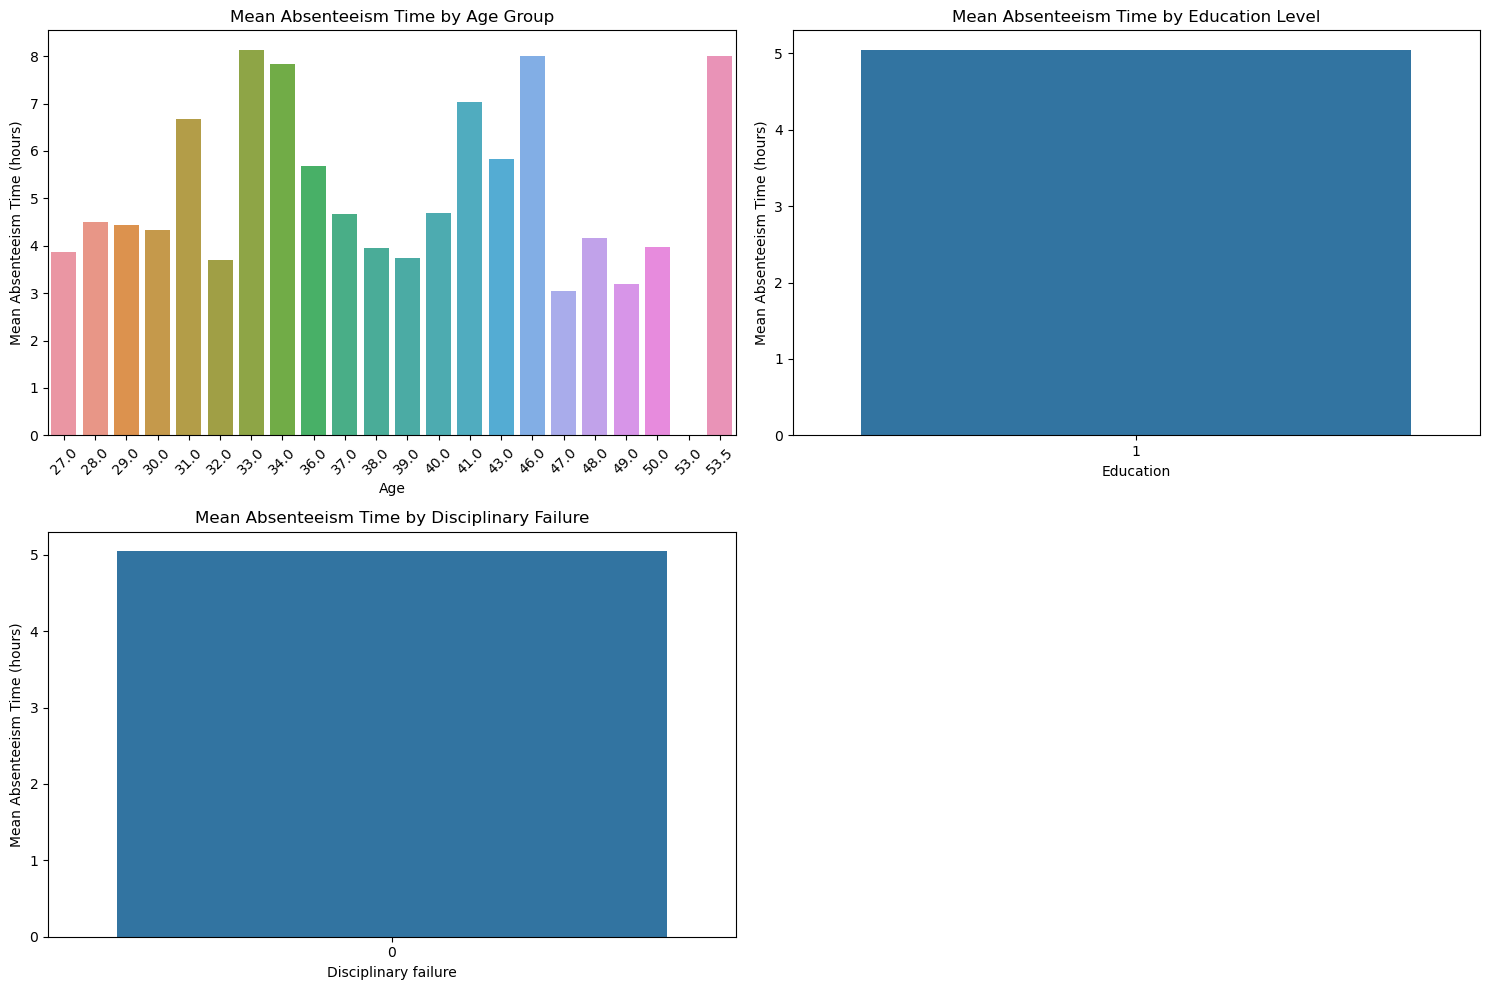

In [48]:
#descriptive analye
age_group=data.groupby("Age")["Absenteeism time in hours"].agg(["mean","median","count"])
Education_group=data.groupby("Education")["Absenteeism time in hours"].agg(["mean","median","count"])
Disciplinary_group=data.groupby("Disciplinary failure")["Absenteeism time in hours"].agg(["mean","median","count"])
print("age_group:",age_group)
print("Education_group:",Education_group)
print("Disciplinary_group:",Disciplinary_group)


# Prepare data for plotting
age_group.reset_index(inplace=True)  # Reset index to make 'Age' a column
Education_group.reset_index(inplace=True)
Disciplinary_group.reset_index(inplace=True)

plt.figure(figsize=(15, 10))

# Age Group Plot
plt.subplot(2, 2, 1)
sns.barplot(x="Age", y="mean", data=age_group)
plt.title("Mean Absenteeism Time by Age Group")
plt.ylabel("Mean Absenteeism Time (hours)")
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity

# Education Group Plot
plt.subplot(2, 2, 2)
sns.barplot(x="Education", y="mean", data=Education_group)
plt.title("Mean Absenteeism Time by Education Level")
plt.ylabel("Mean Absenteeism Time (hours)")

# Disciplinary Group Plot
plt.subplot(2, 2, 3)
sns.barplot(x="Disciplinary failure", y="mean", data=Disciplinary_group)
plt.title("Mean Absenteeism Time by Disciplinary Failure")
plt.ylabel("Mean Absenteeism Time (hours)")

plt.tight_layout()  # Adjusts subplots to fit well within the figure area
plt.show()


Interpretation: There appears to be a general trend of higher absenteeism rates among younger age groups. Younger employees (27-30): While there's some variation, this group generally has higher absenteeism rates compared to older age groups.
Middle-aged employees (31-45): This age range consistently shows lower absenteeism rates. This could be attributed to factors like greater work experience, stability in personal life, or peak physical health.
Older employees (46+): Absenteeism rates vary significantly within this group. Some age groups (e.g., 46-47) have higher absenteeism, while others (e.g., 51-52) have lower rates. This might be influenced by health conditions, retirement planning, or other personal factors.

# TASK 3: Analyze the reason for absence.

                         mean  median  count
Reason for absence                          
0.0                  0.000000     0.0     43
1.0                  8.437500     8.0     16
2.0                 17.000000    17.0      1
3.0                  8.000000     8.0      1
4.0                  4.500000     4.5      2
5.0                  6.333333     8.0      3
6.0                  8.500000     8.0      8
7.0                  7.533333     8.0     15
8.0                  5.333333     5.5      6
9.0                 14.500000    16.5      4
10.0                 8.640000     8.0     25
11.0                 6.576923     8.0     26
12.0                 9.750000    10.0      8
13.0                 8.854545     8.0     55
14.0                 6.789474     4.0     19
15.0                 8.000000     8.0      2
16.0                 2.000000     2.0      3
17.0                 8.000000     8.0      1
18.0                 7.333333     8.0     21
19.0                10.075000     8.0     40
21.0      

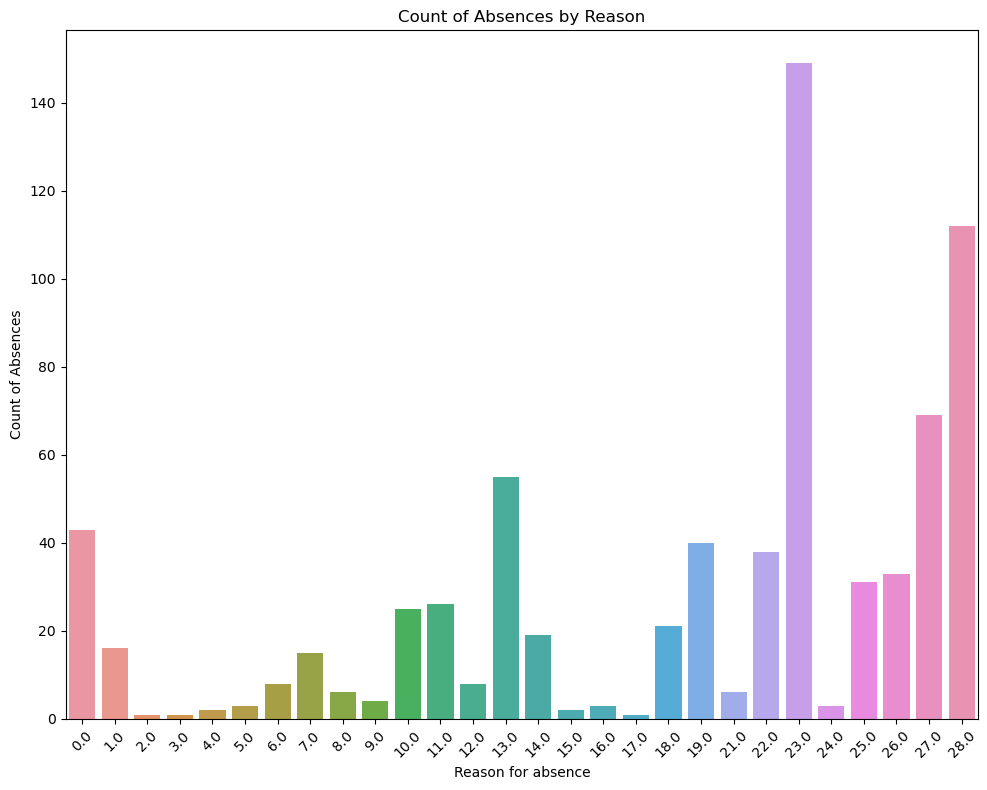

In [42]:
# Grouping data by various columns and calculating summary statistics
reason_for_absence_group = data.groupby("Reason for absence")
["Absenteeism time in hours"].agg(["mean", "median", "count"])

print(reason_for_absence_group)

# Reset index for visualization
reason_for_absence_group.reset_index(inplace=True)

# Visualize the count of reasons for absence
plt.figure(figsize=(10, 8))
sns.barplot(x="Reason for absence", y="count", data=reason_for_absence_group)
plt.title("Count of Absences by Reason")
plt.ylabel("Count of Absences")
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Interpretation: Overall, the bar plot provides valuable insights into the reasons for absenteeism within the organization.
The dominance of reasons 23.0 and 28.0 suggests that these are the primary factors contributing to absenteeism in the organization. These reasons might correspond to specific categories like "unjustified absence," "medical consultation," and "dental consultation."A number of other reasons, such as 19, and 21, have relatively low counts. These might represent less frequent occurrences like "injury" or "external causes."


Least count of Absence: Reasons 2-5: These likely refer to broad categories of diseases, such as cancer, blood disorders, metabolic diseases, and mental health conditions.
Reasons 24 and 25: These might indicate medical procedures like blood donation and laboratory tests.
Reasons 16 and 17: These could represent health issues related to pregnancy and childbirth, such as complications during or after birth, or congenital abnormalities.

      Age  Reason for absence  Count
0    27.0                 6.0      1
1    27.0                 7.0      1
2    27.0                23.0      5
3    28.0                 0.0      4
4    28.0                 1.0      2
..    ...                 ...    ...
196  53.5                 1.0      1
197  53.5                 6.0      2
198  53.5                12.0      1
199  53.5                18.0      2
200  53.5                25.0      2

[201 rows x 3 columns]


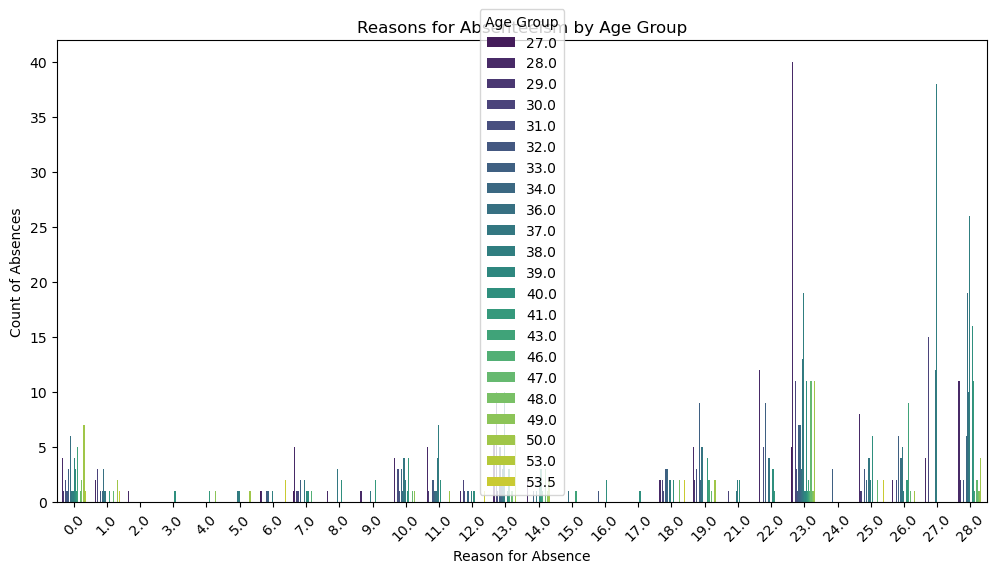

In [43]:
# Group by age and reason for absence to find patterns
age_reason_pattern = data.groupby(['Age', 'Reason for absence']).size().reset_index(name='Count')

# Display the age-reason absenteeism patterns
print(age_reason_pattern)

# Visualize patterns between age and reasons for absence
plt.figure(figsize=(12, 6))
sns.barplot(x='Reason for absence', y='Count', hue='Age', data=age_reason_pattern, palette='viridis')
plt.title('Reasons for Absenteeism by Age Group')
plt.xlabel('Reason for Absence')
plt.ylabel('Count of Absences')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()


The chart reveals distinct patterns in absenteeism reasons across different age groups. For instance, younger age groups (27-30) exhibit a higher frequency of certain absence reasons, while older age groups (40+) may have different predominant reasons.
Dominant Reasons: Certain reasons, such as  the most common reasons for absenteeism are 23, 27, and 28, which likely correspond to medical consultations, physiotherapy, and dental consultations, appear to be more prevalent across multiple age groups. This suggests that these reasons might be common factors influencing absenteeism.

    Education  Reason for absence  Count
0           1                 0.0     43
1           1                 1.0     16
2           1                 2.0      1
3           1                 3.0      1
4           1                 4.0      2
5           1                 5.0      3
6           1                 6.0      8
7           1                 7.0     15
8           1                 8.0      6
9           1                 9.0      4
10          1                10.0     25
11          1                11.0     26
12          1                12.0      8
13          1                13.0     55
14          1                14.0     19
15          1                15.0      2
16          1                16.0      3
17          1                17.0      1
18          1                18.0     21
19          1                19.0     40
20          1                21.0      6
21          1                22.0     38
22          1                23.0    149
23          1   

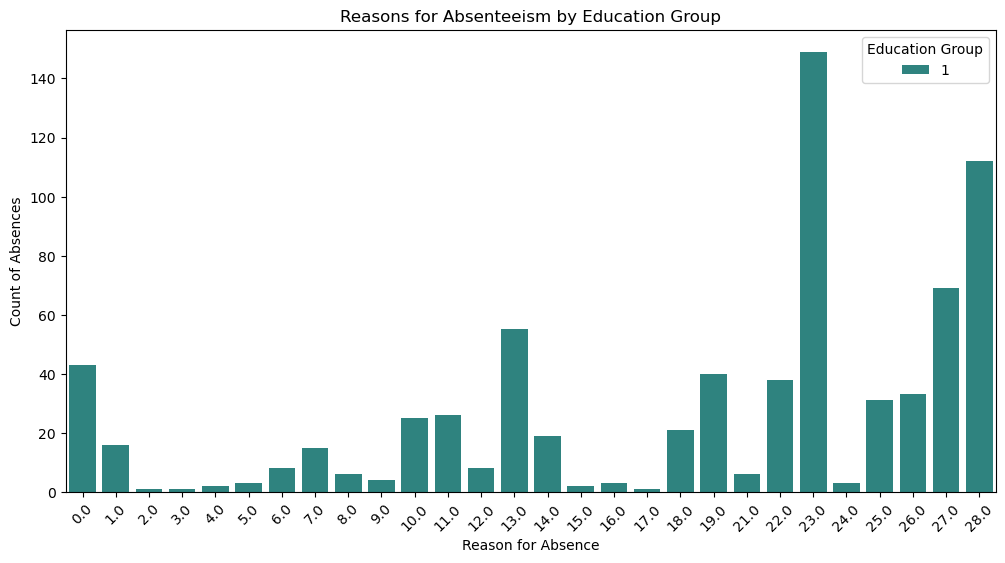

In [44]:
# Group by age and reason for absence to find patterns
Education_reason_pattern = data.groupby(['Education', 'Reason for absence']).size().reset_index(name='Count')

# Display the age-reason absenteeism patterns
print(Education_reason_pattern)

# Visualize patterns between age and reasons for absence
plt.figure(figsize=(12, 6))
sns.barplot(x='Reason for absence', y='Count', hue='Education', data=Education_reason_pattern, palette='viridis')
plt.title('Reasons for Absenteeism by Education Group')
plt.xlabel('Reason for Absence')
plt.ylabel('Count of Absences')
plt.xticks(rotation=45)
plt.legend(title='Education Group')
plt.show()


Interpretation:
Most Common Reasons: Among the high school education group, the most common reasons for absenteeism are 23, 27, and 28, which likely correspond to medical consultations, physiotherapy, and dental consultations. This suggests that a significant portion of absences in this group are due to health-related issues requiring medical attention.
Fewer Instances of Serious Illnesses: Reasons II (Neoplasms), III (Blood disorders), IV (Endocrine diseases), and V (Mental health disorders) have fewer instances, indicating that these serious health conditions are less prevalent among this group.

# TASK 4: Predicting Absenteeism Duration

In [50]:
from sklearn.model_selection import train_test_split
feature_data=data[['Height','Son','Age','Social drinker','Transportation expense','Hit target','Work load Average/day ','Month of absence','Service time','Weight']]
target_data=data['Absenteeism time in hours']
X=feature_data
y=target_data

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [52]:
#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [54]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=MSE**0.5
R2=r2_score(y_test,y_pred)
print("MSE:",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)
print("R2:",R2)

MSE: 21.176804923446674
MAE: 3.326990553912872
RMSE: 4.601826259589411
R2: 0.033269277972623024


In [55]:
feature_data2=data[['Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work', 'Body mass index', 'Service time', 'Age']]
target_data2=data['Absenteeism time in hours']
X2=feature_data2
y2=target_data

In [56]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [57]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = model.predict(X_test2)

In [58]:
MSE=mean_squared_error(y_test2,y_pred2)
MAE=mean_absolute_error(y_test2,y_pred2)
RMSE=MSE**0.5
R2=r2_score(y_test2,y_pred2)
print("MSE:",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)
print("R2:",R2)

MSE: 12.79219361033547
MAE: 2.29436301113358
RMSE: 3.5766176214875793
R2: 0.4160305763811676


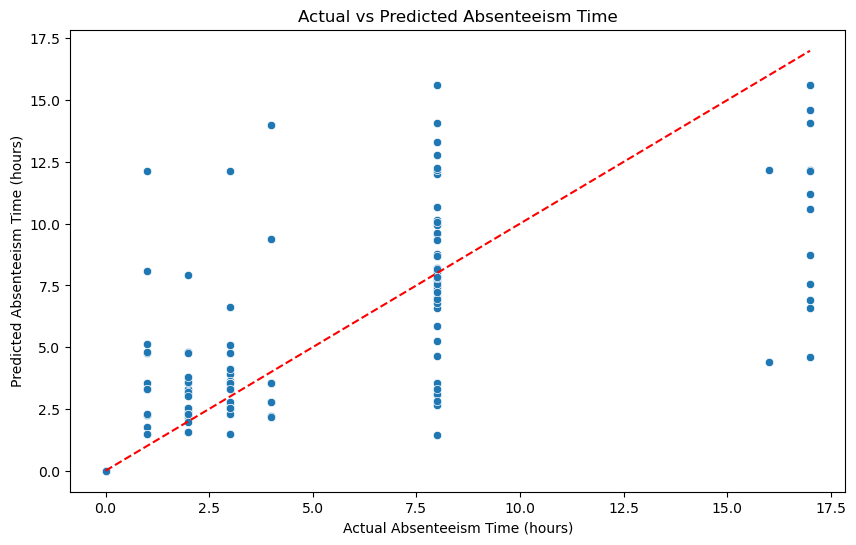

In [63]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test2, y=y_pred2)
plt.xlabel("Actual Absenteeism Time (hours)")
plt.ylabel("Predicted Absenteeism Time (hours)")
plt.title("Actual vs Predicted Absenteeism Time")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
plt.show()


Interpretation: 
MSE: The mean squared error has decreased from 21.1768 to 12.7922. This means the average squared difference between predicted and actual values has reduced, indicating better overall accuracy.

MAE: The mean absolute error has decreased from 3.3269 to 2.2944. This shows a reduction in the average absolute difference between predictions and actual values, indicating more consistent accuracy.

RMSE: The root mean squared error has decreased from 4.6018 to 3.5766. This represents a reduction in the average magnitude of the errors, suggesting that the model is making more accurate predictions overall.

R²: The R-squared value has increased from 0.0333 to 0.4160. This indicates that the final model explains a much larger portion of the variability in the target variable, suggesting a stronger relationship between the independent variables and the dependent variable.

The improvements in all metrics demonstrate that the final model is a better fit for the data and provides more accurate predictions.